![stars-header](./visuals/stars_header.png)

[Executive-Summary](./visuals/executive_summary.png)


# Imports

In [1]:
# Import data manipulation libraries
import pandas as pd
import numpy as np
import src

# Import data visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import radviz
from mpl_toolkits.mplot3d import Axes3D

# Import libraries to perform hypothesis testing
from scipy.stats import f_oneway, ttest_1samp, ttest_ind, chi2_contingency, ttest_ind, kruskal

# Import preprocessing libraries
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, classification_report

from warnings import filterwarnings
filterwarnings('ignore')

# Gathering the Stars in our Notebook: Acquire
---
Our stars are sitting in a file named `stars.csv`. Let's load it into our notebook using Pandas and explore it together.

In [2]:
# Read in the file named `stars.csv` from the data folder
df = src.get_star_data()

# Display the first 5 rows
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [3]:
# Display the last 5 rows
df.tail()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
235,38940,374830.0,1356.0,-9.93,Blue,O,5
236,30839,834042.0,1194.0,-10.63,Blue,O,5
237,8829,537493.0,1423.0,-10.73,White,A,5
238,9235,404940.0,1112.0,-11.23,White,A,5
239,37882,294903.0,1783.0,-7.80,Blue,O,5


## Initial Observations of the Beginning and End
---
### Let's learn about each feature
__Super HOT: `Temperature` (in kelvins)__
> The context of our dataset is objects in __SPACE__. The temperature values are in Kelvin scale and represent something hot, really hot. Our Sun has a surface temperature of 5,778 Kelvin. Looking at the last 5 stars of our dataset, we can see there are 3 stars that have a temperature 6 times as hot as the Sun.

#### Twinkle Twinkle : `L` for Relative Luminosity
> Luminosity is the amount of light an object gives off. This value represents the light emitted from a star relative to the luminosity of the Sun.
>
> `relative_luminosity` = Luminosity of a Star / Luminosity of the Sun

#### Round: `R` for Relative Radius
> Similar to `relative_luminosity`, the __radius__ of each star is relative to the radius of the Sun. From the last 5 rows of the dataset, we can see a few of stars have a radius 1,000 times larger than the Sun!
>
> `relative_radius` = Radius of a Star / Radius of the Sun

#### Comparing Twinkles to Twinkles: `A_M` for Absolute Magnitude
> __`Absolute magnitude`__ is a measure of the absolute brightness of a star. The brightness of each star is compared on a similar scale by setting the distance between the viewer (You and I) and the star to a distance of 10 parsecs (32.61 Light Years) in Space. The values are an inverse scale meaning brighter objects have a negative absolute magnitude and dim objects have a positive absolute magnitude.
>
>[las-cumbres-observatory-absolute-magnitude](https://lco.global/spacebook/distance/what-absolute-magnitude/)
>
><br>
><details>
    <summary>CLICK HERE for a visual explanation of Absolute magnitude</summary>
    <img src=./visuals/absolute_magnitude_explanation.png width="800" height="600" />
</details>

#### What Color is it?: `Color`
> Nothing fancy here so far. The colors we see are within the __"Visible Spectrum"__, the portion of the electromagnetic spectrum visible to the human eye. These colors include: Violet, Blue, Cyan, Green, Yellow, Orange, Red, and White (a mixture of colors). Let's check if there are more colors in a bit.
>
> [color-spectrum-wiki](https://en.wikipedia.org/wiki/Visible_spectrum#Spectral_colors)

#### Characteristics of a Star using Hydrogen???: `Spectral_Class`
> To understand this feature, we need to understand the Morgan-Keenan system.
>
> The Morgan-Kennan System classifies a star based on the temperature of its photosphere and ionization state. The photosphere is the outer shell of a star that radiates light. The temperature is evaluated on a letter scale: O>B>A>F>G>K>M where 'O' is the hottest and 'M' is the coolest.
>
> [morgan-keenan-wiki](https://en.wikipedia.org/wiki/Stellar_classification)

#### Name that Star: `Type`
> There are 6 types of stars in our dataset:
>
> Hyper Giants, Super Giants, Main Sequence, White Dwarf, Brown Dwarf, White Dwarf

In [4]:
# Display the column names, # of non-null observations, and the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
df.nunique()

Temperature       228
L                 208
R                 216
A_M               228
Color              17
Spectral_Class      7
Type                6
dtype: int64

In [6]:
# Check to see if there are any duplicate rows
df.duplicated().any()

False

### Info Observations

We have 240 stars in our dataset and no missing values.
There are no duplicate rows in the dataset.

`Temperature`, `Luminosity`, `Radius`, and `Absolute Magnitude` are continuous features that contain a few repeating values. `Color`, `Spectral Class`, and `Type` are categorical values with object and numeric data types.

There are 17 unique `colors` in the dataset.

## Summary Statistics

In [7]:
# Display Summary Statistics of the object columns
df.describe(include='object')

,Color,Spectral_Class
count,240,240
unique,17,7
top,Red,M
freq,112,111


In [8]:
# Display Summary Statistics of the numeric columns
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


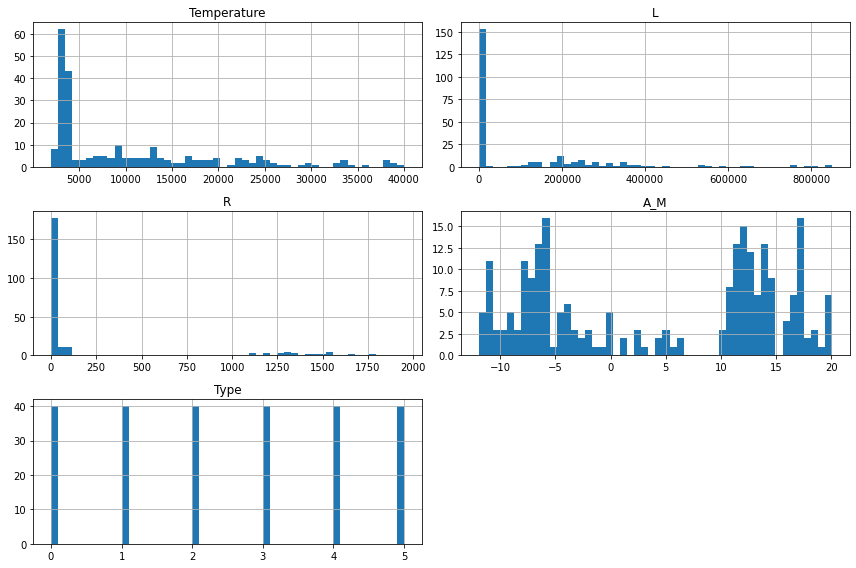

In [9]:
# Display the spread of each feature as a histogram
df.hist(figsize=(12, 8), bins=50)
plt.tight_layout();

### Summary Statistics Oberservations
- The distributions of `Temperature`, `Luminosity`, and `Radius` are positively skewed.
- `Absolute Magnitude` has a bimodal distribution.
- `Type` has a uniform distribution.


## Acquire Takeaways
- Stars dataset acquired from Kaggle:
- Created a function called `get_star_data()` in the `src` package.
- Temperature, Luminosity, Radius, and Absolute Magnitude are non-normally distributed.

<br>

# Grab your Telescopes: Prepare
---
## Data Cleaning

Created a function named `prep_star_data()` to clean the dataset.
1. Lowercase column names for easier data manipulation.
2. Rename ambiguous column names with descriptive names.
3. Map `star_type` numeric id's with their actual star name in a column called `star_type_name`
4. Convert the datatype of the `spectral_class`, and `color` to categorical and create coded versions of these columns.
5. Clean and normalize the text in the `color` column.
6. Drop the unscaled columns: `temperature`, `
6. Rearrange columns.

In [10]:
# Clean the stars dataset
df = src.prep_star_data(df)

## Create the train, validate, and test datasets
Created a function named `create_datasets()` to split the dataset into train, validate, and test sets.

The data was split using a 50%-37.5%-12.5% method. Stratifying the splits by the target variable `star_type` means that each `star_type` is split 20-15-5, 40 stars for each star type.

In [11]:
train, validate, test = src.create_datasets(df)

## Feature Engineering

Created a function named `scale_data()` that adds scaled features to the train, validate, and test datasets.

Scaled Temperature, Luminosity, Radius, and Absolute Magnitude columns using a MinMaxScaler. The scaled data was transformed into a normal distribution using Quantile Transformer

In [12]:
train, validate, test = src.scale_data(train, validate, test)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 236 to 133
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   color                         120 non-null    category
 1   spectral_class                120 non-null    category
 2   scaled_temperature            120 non-null    float64 
 3   scaled_luminosity             120 non-null    float64 
 4   scaled_radius                 120 non-null    float64 
 5   scaled_absolute_magnitude     120 non-null    float64 
 6   quantiled_temperature         120 non-null    float64 
 7   quantiled_luminosity          120 non-null    float64 
 8   quantiled_radius              120 non-null    float64 
 9   quantiled_absolute_magnitude  120 non-null    float64 
 10  star_type_name                120 non-null    object  
 11  star_type                     120 non-null    int64   
dtypes: category(2), float64(8), int64(1), object(1)


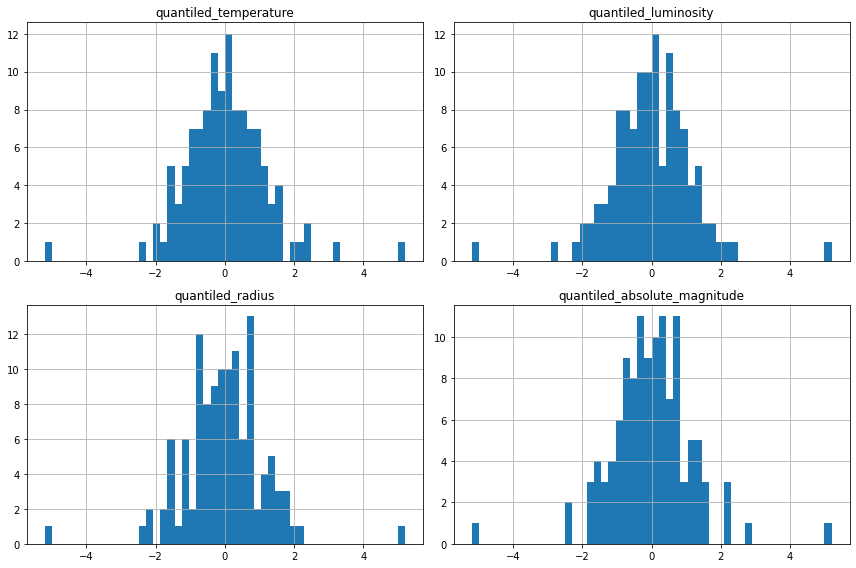

In [13]:
train.iloc[:,6:10].hist(figsize=(12, 8), bins=50)
plt.tight_layout();

# Explore the Stars: Exploration
---
So, what determines __Star Type__? Let's find out by visualizing the features and forming hypothesis we can test.

### Continuous Feature Visualizations
- Pearson's R Correlation Plot
- Pairplots
    - Scaled Features
    - Quantiled Features
- 3-D Scatterplot

### Continuous v. Discrete Feature Visualizations
- Boxplots

### Discrete v. Discrete Feature Visualizations
- Crosstables
- Parallel plot

<br>

## Pearson's Correlation

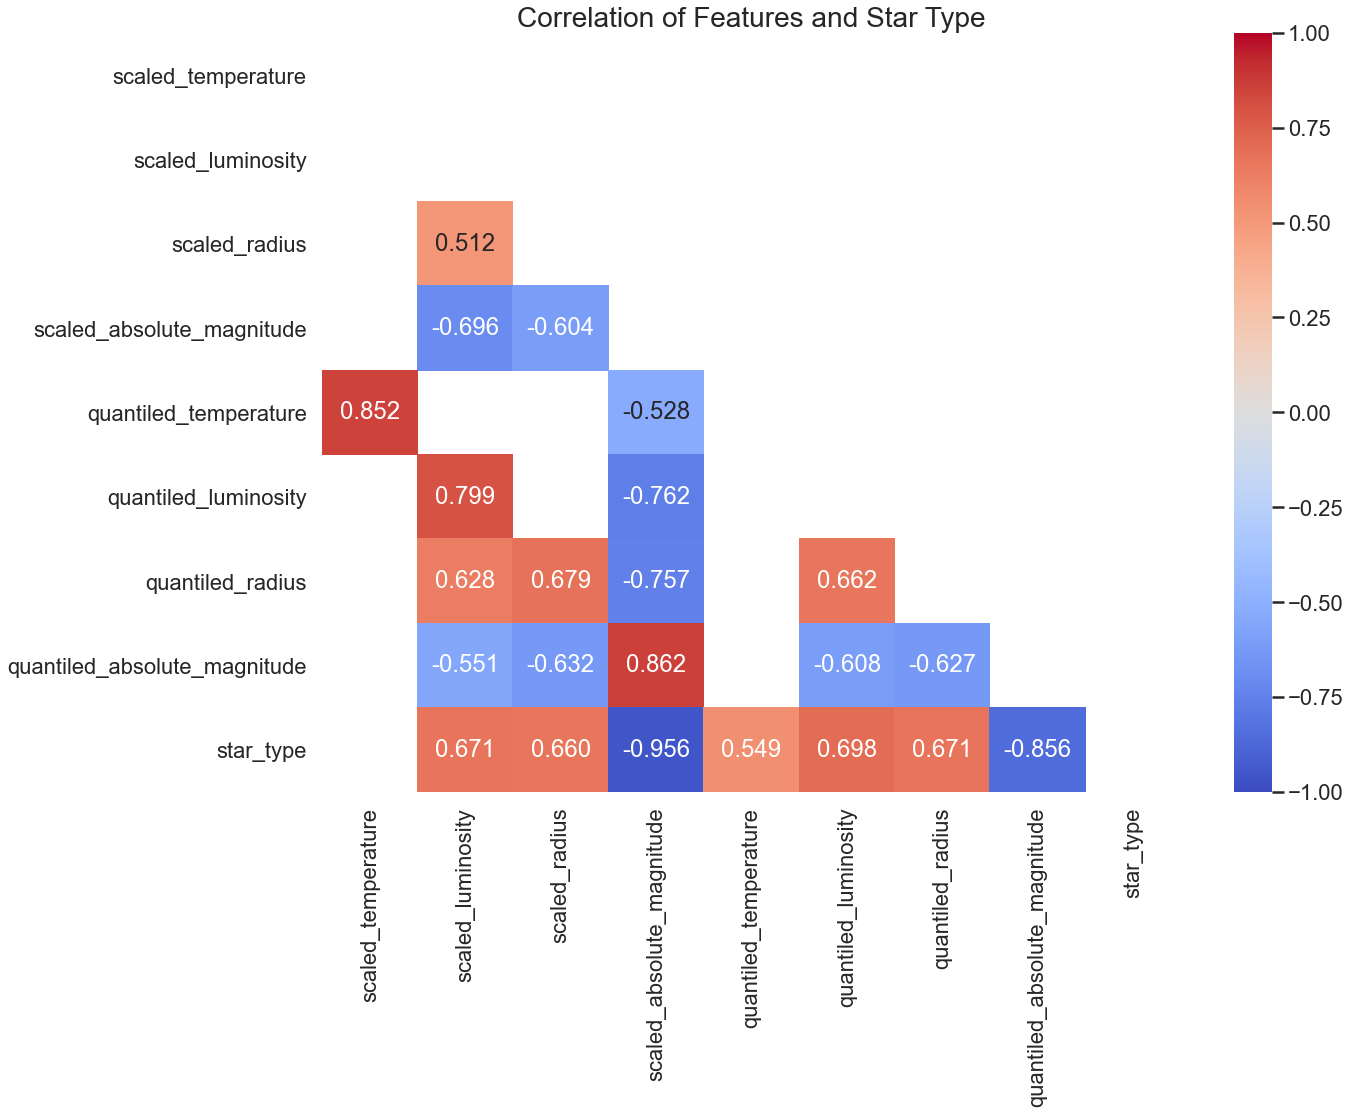

In [14]:
src.pearson_correlations(train)

###  Pearson Correlation Observations


## Pairplots

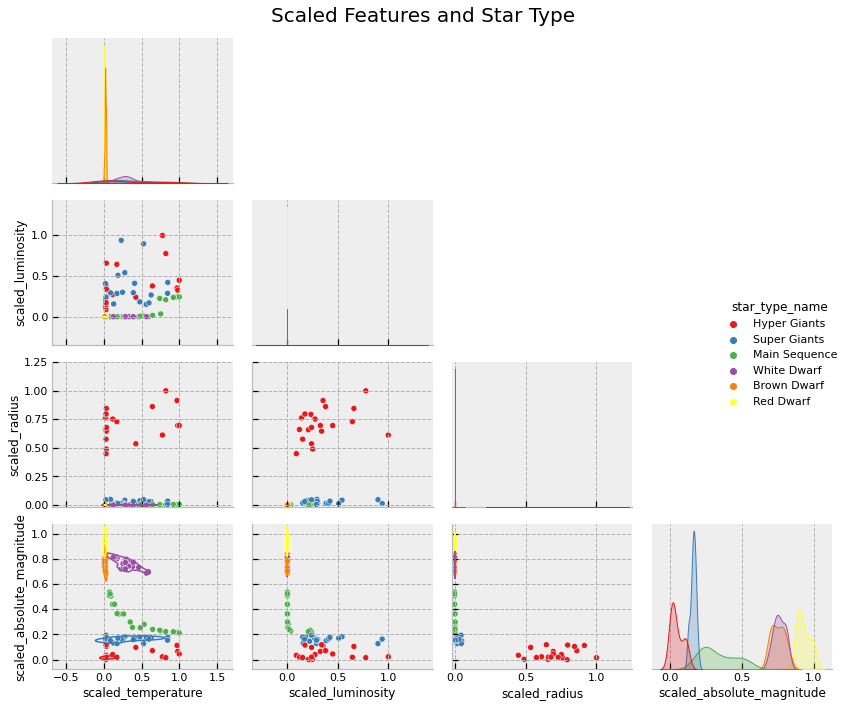

In [15]:
src.scaled_pairplot(train)

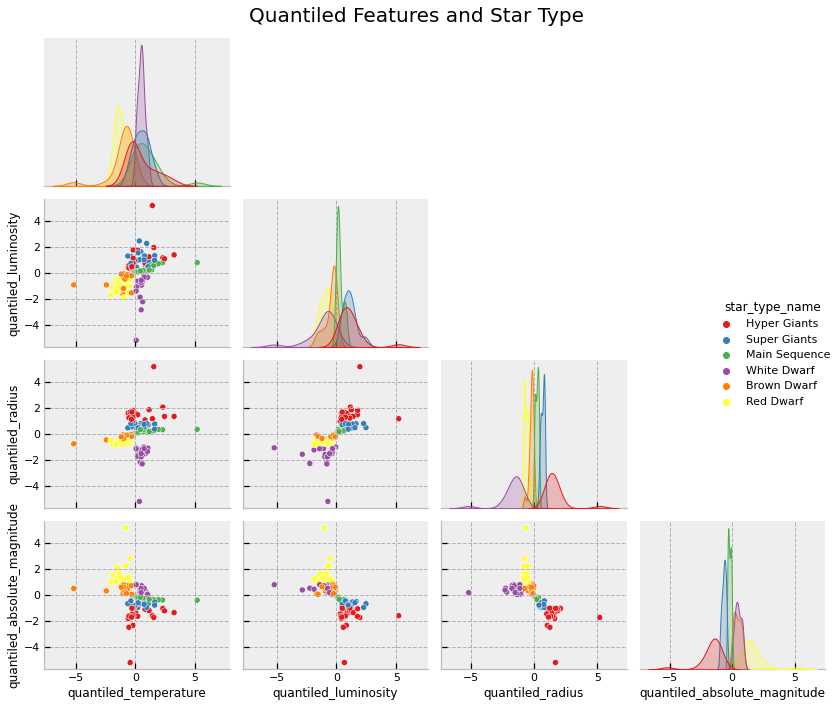

In [16]:
src.quantiled_pairplot(train)

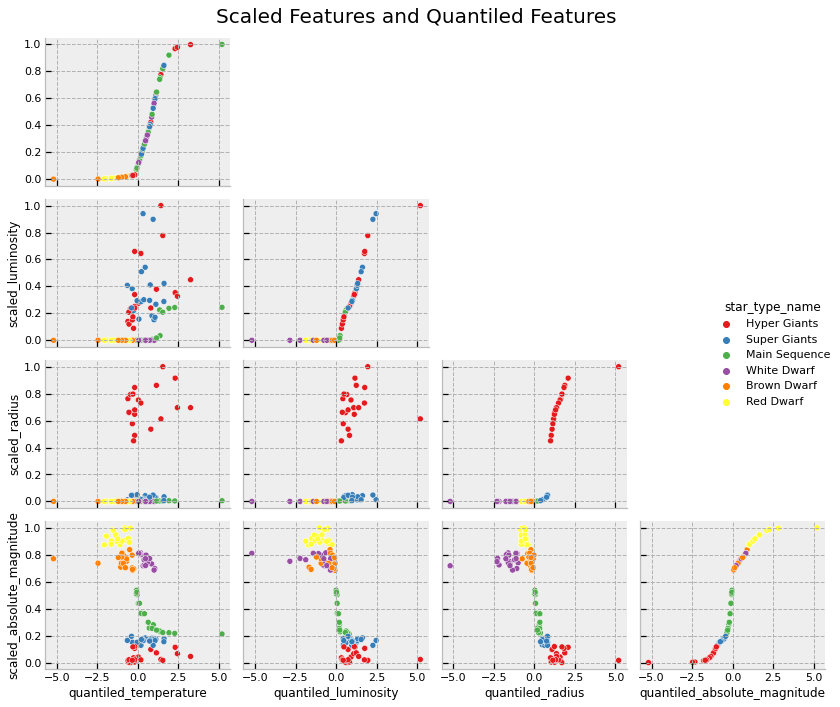

In [17]:
src.scaled_quantiled_pairplot(train)

### Pairplot Observations

### 3-Dimensional Scatter Plot

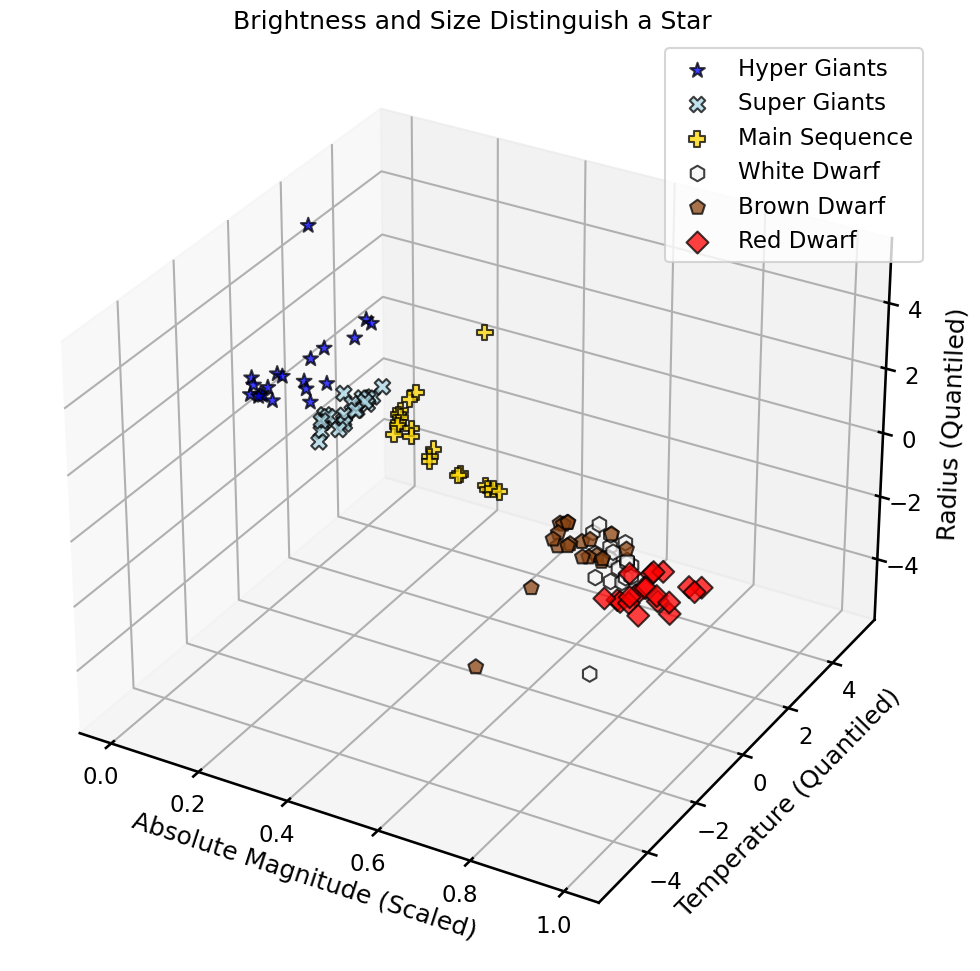

In [18]:
src.three_d_scatter(train)

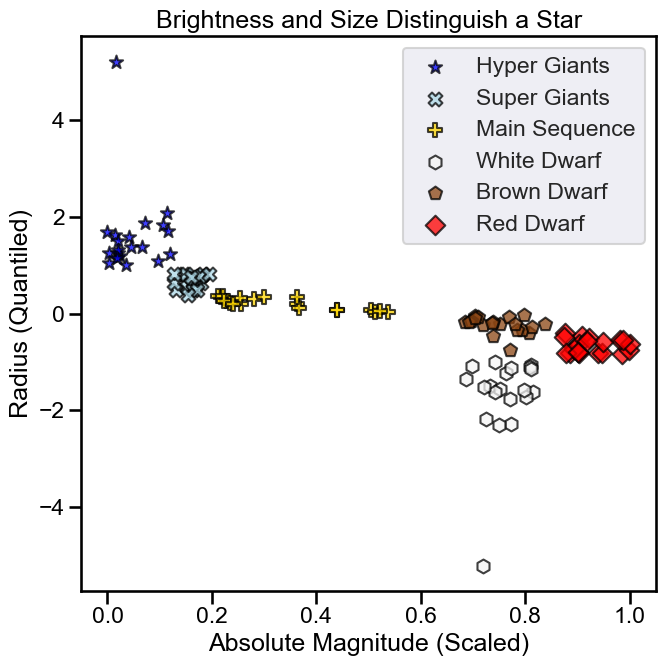

In [19]:
src.two_d_scatter(train)

## Distribution of Values across Star Types: Boxplots

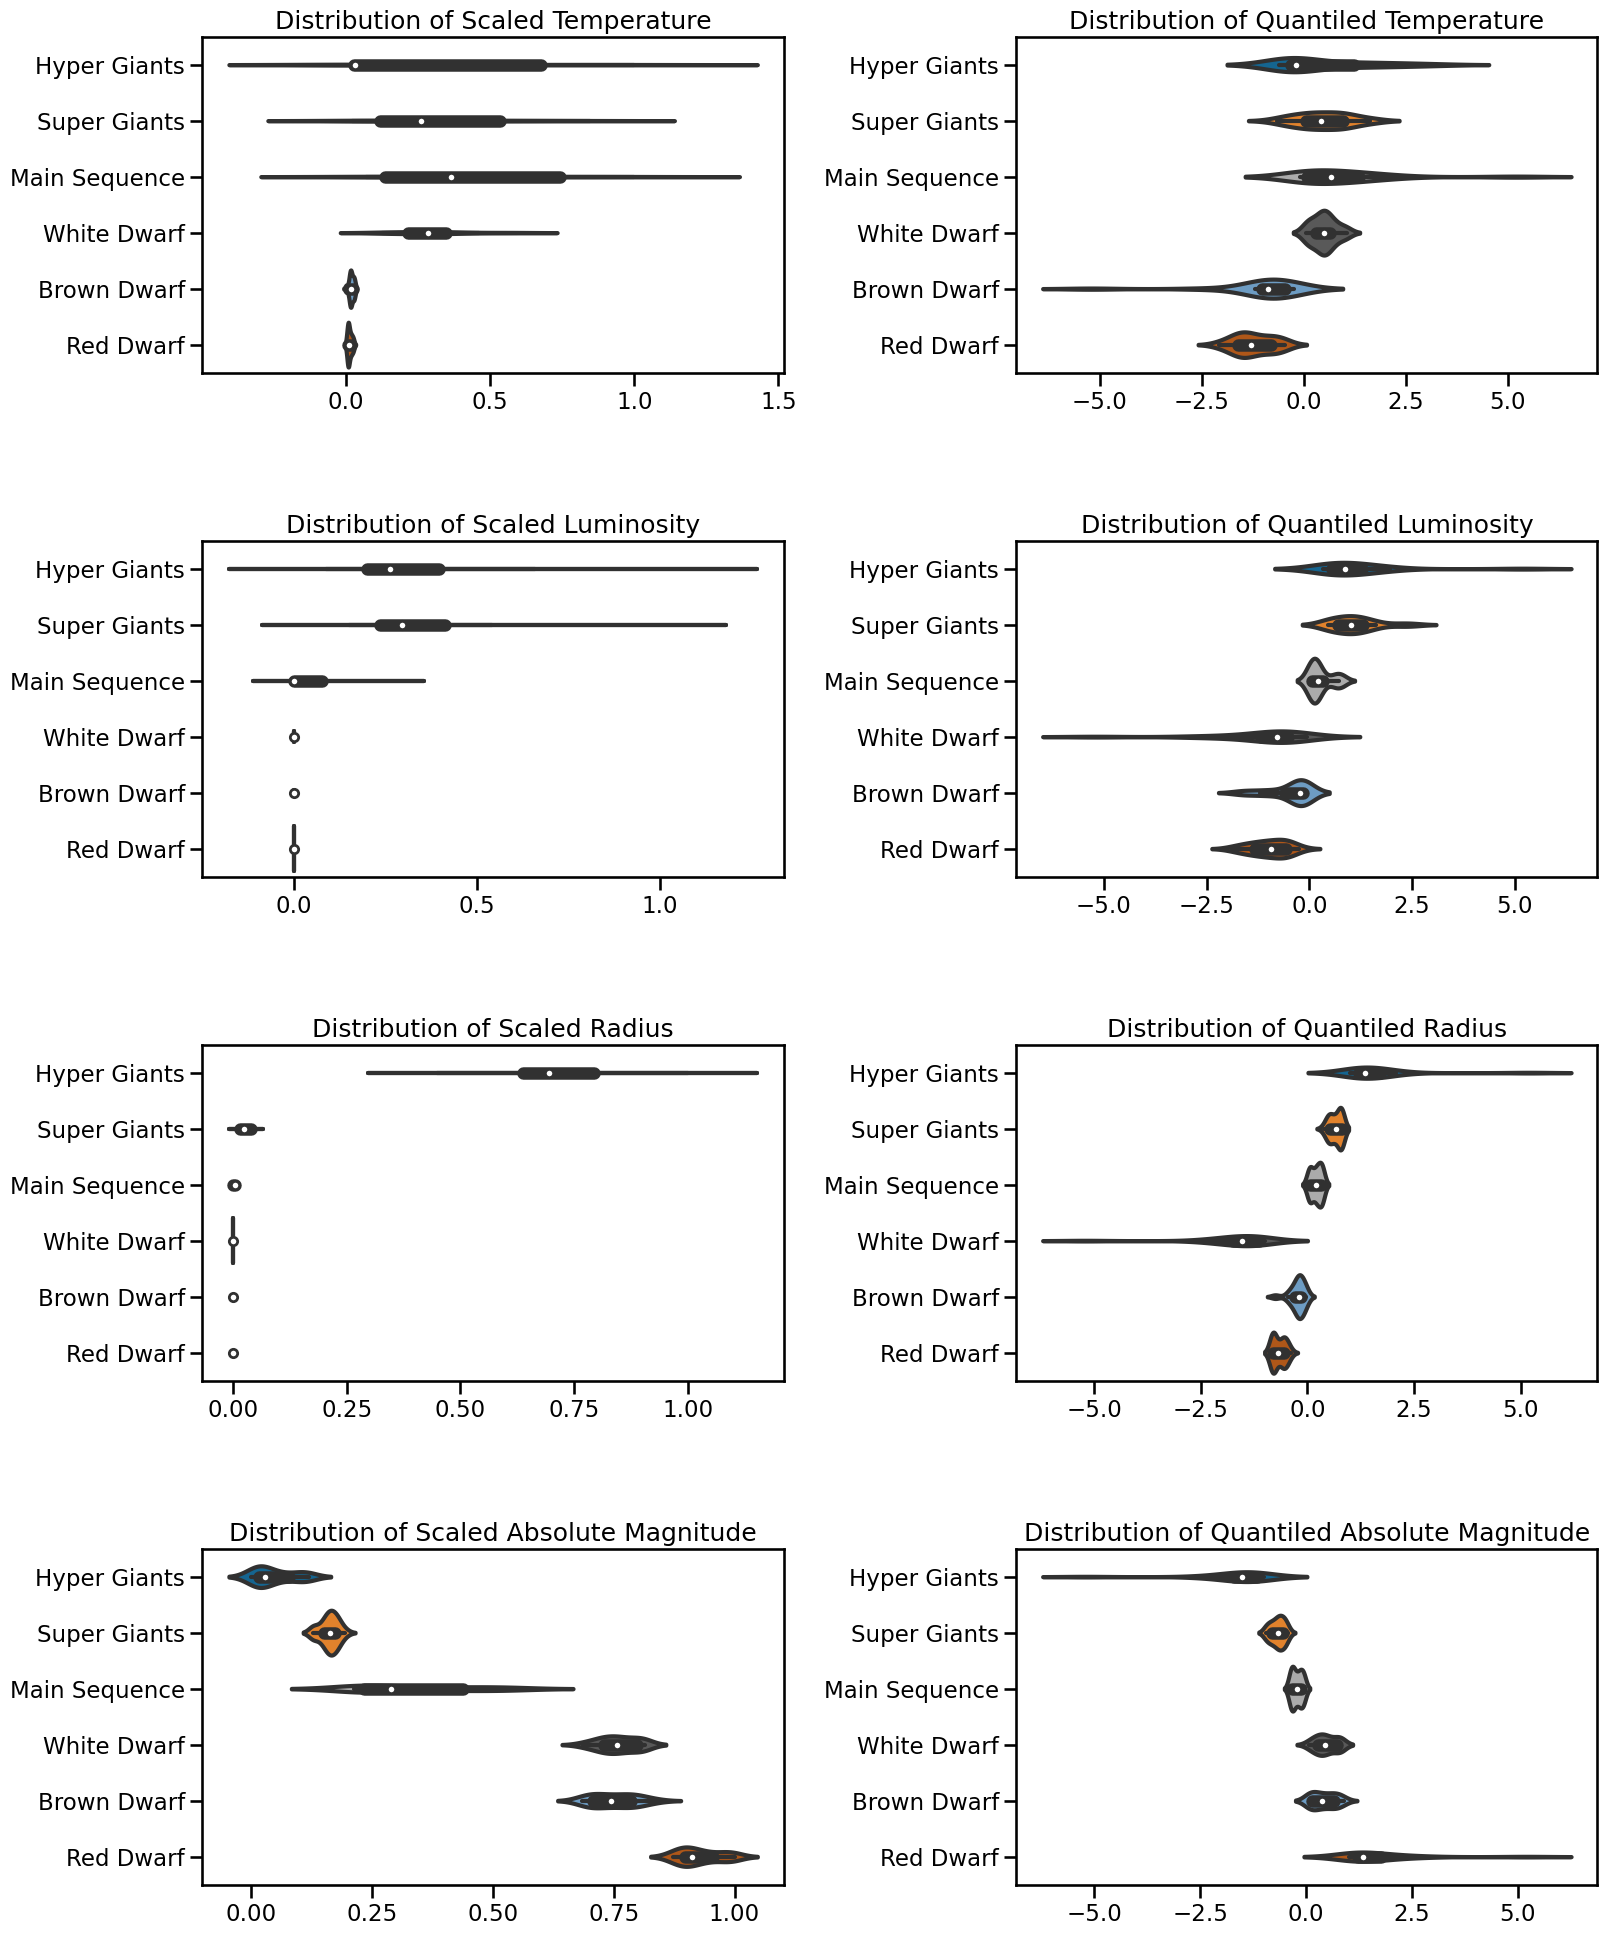

In [20]:
src.violinplots(train)

## Categorical Features

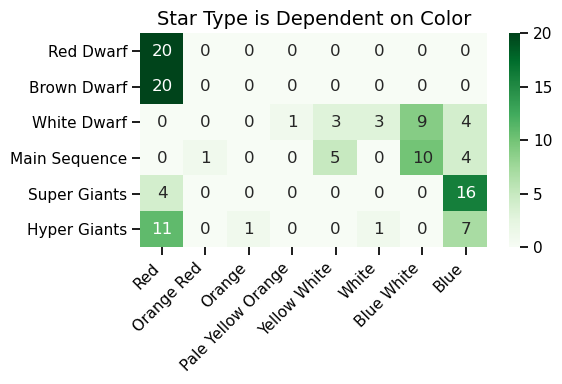

In [21]:
star_color_ctb = src.stars_by_color(train)

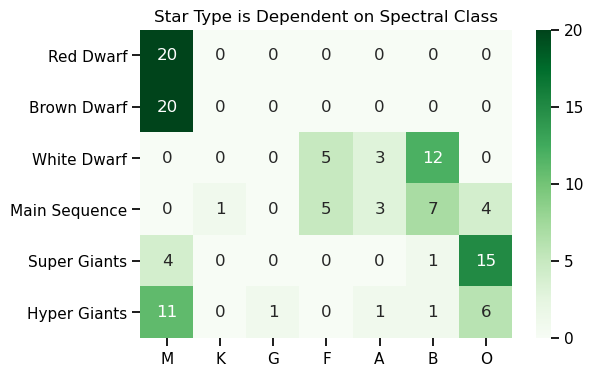

In [22]:
star_spectral_ctb = src.stars_by_spectral_class(train)

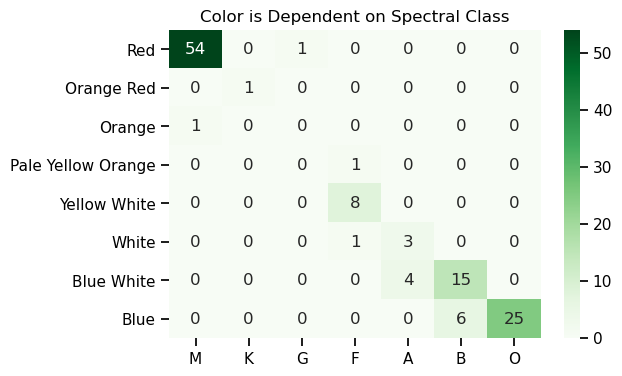

In [23]:
color_spectral_ctb = src.color_by_spectral_class(train)

#### Crosstab Observations

## Parallel Plot

![parallel-plot](./visuals/para_plot.png)

## Hypothesis Testing

In [24]:
# Create datasets for t-tests
hyper, super_, sequence, white, brown, red = src.ttest_datasets(train)

### Do Super Giants, Main Sequence, Brown Drawfs, and Red Dwarfs have significantly different radii?

#### ANOVA Test

_Establish Hypotheses_:

$H{0}$: The average `quantiled radius` of each star is equal to the population mean.

$H{1}$ The average `quantiled radius` of each star is significantly different than the population mean.

In [25]:
_, p = f_oneway(super_, sequence, brown, red)

src.evaluate_p_value(p)

0.000 < 0.05
Reject the null hypothesis


Let's determine if each sample is significantly different between pairs of stars.

## Is the radius of each star significantly different from each sample?

__Two Sample, Two Tailed T-Test__

_Establish Hypotheses_:

$H{0}$: The average `quantiled radius` of __Super Giants__ and __Main Sequence__ Stars is equal.

$H{1}$ The average `quantiled radius` of __Super Giants__ and __Main Sequence__ Stars is significantly different.

In [26]:
_, p = ttest_ind(super_, sequence)

src.evaluate_p_value(p)

0.000 < 0.05
Reject the null hypothesis


<br>

_Establish Hypotheses_:

$H{0}$: The average `quantiled radius` of __Super Giants__ and __Brown Dwarfs__ is equal.

$H{1}$ The average `quantiled radius` of __Super Giants__ and __Brown Dwarfs__ is significantly different.

In [27]:
_, p = ttest_ind(super_, brown)

src.evaluate_p_value(p)

0.000 < 0.05
Reject the null hypothesis


<br>

_Establish Hypotheses_:

$H{0}$: The average `quantiled radius` of __Super Giants__ and __Red Dwarfs__ is equal.

$H{1}$ The average `quantiled radius` of __Super Giants__ and __Red Dwarfs__ is significantly different.

In [28]:
_, p = ttest_ind(super_, red)

src.evaluate_p_value(p)

0.000 < 0.05
Reject the null hypothesis


<br>

_Establish Hypotheses_:

$H{0}$: The average `quantiled radius` of __Main Sequence__ and __Brown Dwarfs__ is equal.

$H{1}$ The average `quantiled radius` of __Main Sequence__ and __Brown Dwarfs__ is significantly different.

In [29]:
_, p = ttest_ind(sequence, brown)

src.evaluate_p_value(p)

0.000 < 0.05
Reject the null hypothesis


<br>

_Establish Hypotheses_:

$H{0}$: The average `quantiled radius` of __Main Sequence__ and __Red Dwarfs__ is equal.

$H{1}$ The average `quantiled radius` of __Main Sequence__ and __Red Dwarfs__ is significantly different.

In [30]:
_, p = ttest_ind(sequence, red)
src.evaluate_p_value(p)

0.000 < 0.05
Reject the null hypothesis


<br>

_Establish Hypotheses_:

$H{0}$: The average `quantiled radius` of __Brown Dwarfs__ and __Red Dwarfs__ is equal.

$H{1}$ The average `quantiled radius` of __Brown Dwarfs__ and __Red Dwarfs__ is significantly different.

In [31]:
_, p = ttest_ind(brown, red)
src.evaluate_p_value(p)

0.000 < 0.05
Reject the null hypothesis


<br>

_Establish Hypotheses_:

$H{0}$: The average `quantiled radius` of __Hyper Giants__ and __White Dwarfs__ is equal.

$H{1}$ The average `quantiled radius` of __Hyper Giants__ and __White Dwarfs__ is significantly different.

In [32]:
_, p = ttest_ind(hyper, white)

src.evaluate_p_value(p)

0.000 < 0.05
Reject the null hypothesis


## Is a star's type dependent on the spectral class?

__Chi Squared Test__

_Establish Hypotheses_:

$H{0}$: A star's type is independent of its spectral class.

$H{1}$: A star's type is dependent on its spectral class.

In [33]:
chi, p, dof, _ = chi2_contingency(star_spectral_ctb)

src.evaluate_p_value(p)

0.000 < 0.05
Reject the null hypothesis


## Is a star's type dependent on its color?

__Chi Squared Test__

_Establish Hypotheses_:

$H{0}$: A star's type is independent of color

$H{1}$: A star's type is dependent on color.

In [34]:
chi, p, dof, _ = chi2_contingency(star_color_ctb)

src.evaluate_p_value(p)

0.000 < 0.05
Reject the null hypothesis


## Is spectral class dependent on color?

__Chi Squared Test__

_Establish Hypotheses_:

$H{0}$: Spectral class is independent of color

$H{1}$: Spectral class is dependent on color.

In [35]:
chi, p, dof, _ = chi2_contingency(color_spectral_ctb)

src.evaluate_p_value(p)

0.000 < 0.05
Reject the null hypothesis


### Exploration Summary

<br>


# Model
---
1. Preprocessing: Split datasets into feature and target
1. Create a baseline model
1. Create a model
1. Compare model with the baseline

## Preprocessing

In [36]:
X_train, y_train, X_validate, y_validate, X_test, y_test = src.get_model_data(train, validate, test)

In [37]:
X_train.head()

,scaled_temperature,scaled_absolute_magnitude,quantiled_temperature,quantiled_radius,color_blue,color_blue white,color_orange,color_orange red,color_pale yellow orange,color_red,...,color_whitish,color_yellow white,color_yellowish,spectral_class_M,spectral_class_K,spectral_class_G,spectral_class_F,spectral_class_A,spectral_class_B,spectral_class_O
236,0.775667,0.023263,1.429188,1.187018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
166,0.475604,0.180688,0.877330,0.804667,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29,0.126694,0.810707,0.069663,-1.060862,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
176,0.422744,0.097514,0.805769,1.091496,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
113,0.021386,0.014022,-0.607165,1.625118,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [38]:
y_train

,star_type
236,5
166,4
29,2
176,5
113,5
...,...
175,5
149,2
191,1
12,1


## Create a Baseline Model

In [39]:
y_train.value_counts()

star_type
0            20
1            20
2            20
3            20
4            20
5            20
dtype: int64

In [40]:
total = y_train.count()[0]
print(total)

120


In [41]:
baseline = 28/total
print(f'The baseline model makes a correct prediction about 1/6 times or {baseline:.2%}.')

The baseline model makes a correct prediction about 1/6 times or 23.33%.


## Create a Classification Model

In [42]:
# Create model object
tree = DecisionTreeClassifier(random_state=369)

# Fit the object to the data
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=369)

### Train

In [43]:
# Calculate the accuracy of the training set
tree.score(X_train, y_train)

1.0

#### Cross Validation

In [44]:
print('Performing Cross Validation...', end='\n\n')
cross_validation = cross_val_score(DecisionTreeClassifier(),
                                   X_train,
                                   y_train,
                                   cv=10,
                                   scoring='accuracy',
                                   n_jobs=-1)

print('Scoring Metric: Accuracy', end='\n\n')

print('Results'.center(21, '-'))
print(f'Lowest Score: {cross_validation.min():.2%}')
print(f'Highest Score:{cross_validation.max():.2%}')
print(f'Average Score: {cross_validation.mean():.2%}')

Performing Cross Validation...

Scoring Metric: Accuracy

-------Results-------
Lowest Score: 100.00%
Highest Score:100.00%
Average Score: 100.00%


### Validate

In [45]:
print(f'Accuracy of the Validation set: {tree.score(X_validate, y_validate):.2%}')

Accuracy of the Validation set: 100.00%


### Test

In [46]:
test_score = tree.score(X_test, y_test)
print(f'Accuracy of the Test set: {test_score:.2%}')

Accuracy of the Test set: 100.00%


### Evaluate

In [47]:
y_pred = tree.predict(X_test)

c_matrix = confusion_matrix(y_test, y_pred)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [49]:
star_type_map = {0: 'Red Dwarf',
                 1: 'Brown Dwarf',
                 2: 'White Dwarf',
                 3: 'Main Sequence',
                 4: 'Super Giants',
                 5: 'Hyper Giants'}

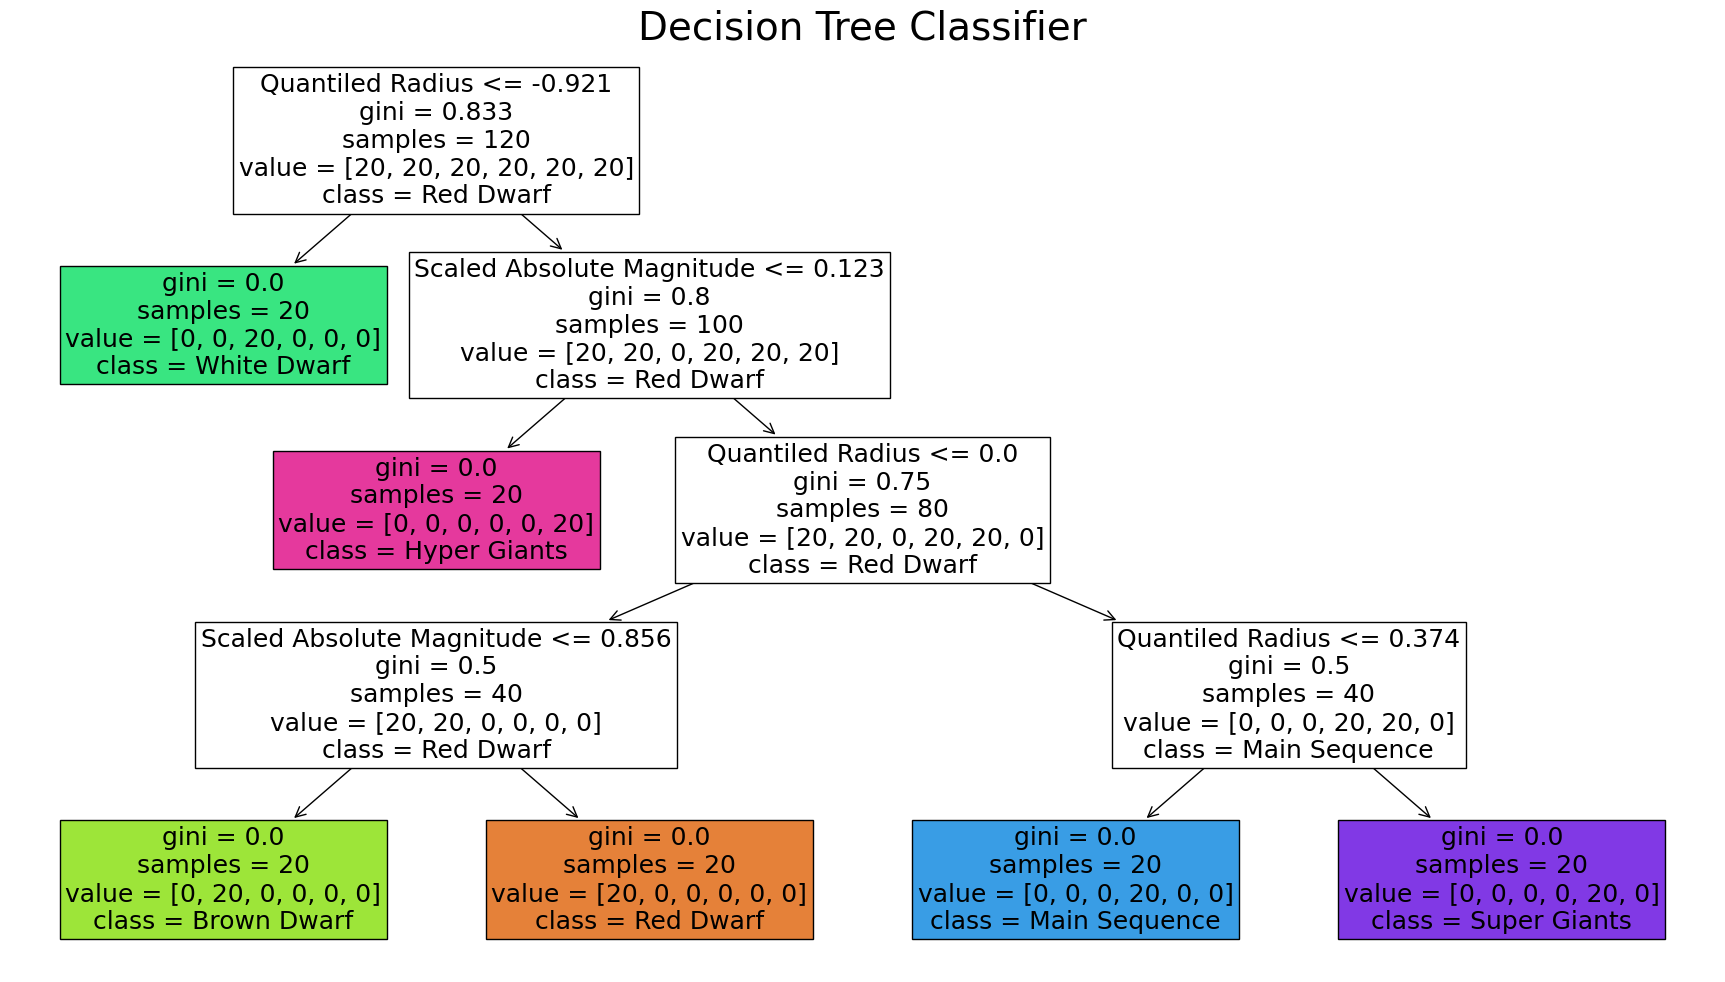

In [50]:
sns.set_context('notebook')

plt.figure(figsize=(22, 12))
plot_tree(tree,
          feature_names=[column.replace('_', ' ').title() for column in X_test.columns],
          fontsize=18,
          class_names=list(star_type_map.values()),
          filled=True)

plt.title('Decision Tree Classifier', fontsize=28)
plt.show()

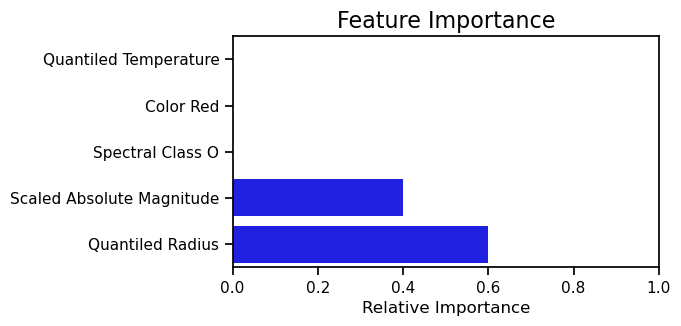

In [51]:
indices = list(np.argsort(tree.feature_importances_))
importances = tree.feature_importances_[indices]

features = list(X_train.columns[indices])
features_fmt = [star.replace('_', ' ').title() for star in features]

sns.set_context('notebook')

plt.figure(figsize=(5.5, 3))
sns.barplot(x=importances[-5:],
            y=features_fmt[-5:],
            orient='h',
            color='blue')

plt.title('Feature Importance', fontsize=16)
plt.xlabel('Relative Importance')
plt.xlim(0, 1)
plt.show()

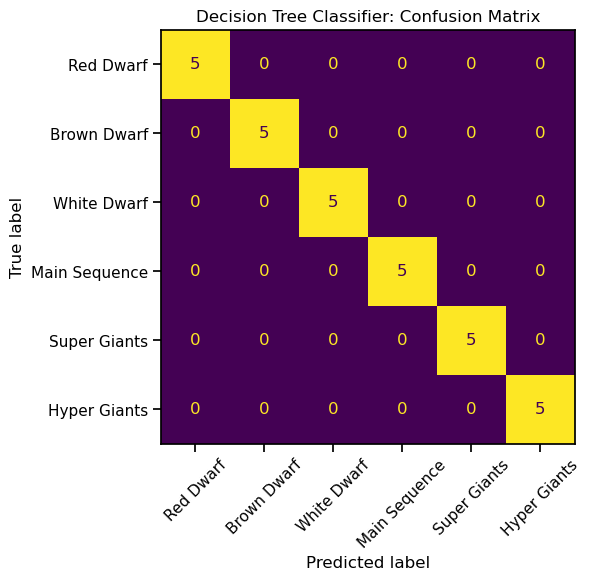

In [52]:
sns.set_context('notebook')
c_matrix_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                              display_labels=star_type_map.values())

fig, ax = plt.subplots(figsize=(6,6))
c_matrix_display.plot(ax=ax, colorbar=False, xticks_rotation=45)

plt.title('Decision Tree Classifier: Confusion Matrix')
plt.tight_layout()
plt.show()

In [53]:
delta = (test_score/baseline)-1
print(f'Our decision tree classification model out performed the baseline by {delta:.0%}.')

Our decision tree classification model out performed the baseline by 329%.


# Conclusions
---

A star is defined by its absolute magnitude and radius.